# IPL Score Prediction 

Since the dawn of the IPL in 2008, it has attracted viewers all around the globe. A high level of uncertainty and last-minute nail-biters have urged fans to watch the matches. Within a short period, the IPL has become the highest revenue-generating league in cricket. In a cricket match, we often see the scoreline showing the probability of the team winning based on the current match situation. This prediction is usually done with the help of data analytics. Before, when there were no advancements in machine learning, predictions were usually based on intuition or some basic algorithms. 


mid - match id

date - when matches are played

venue - place where matches are played

bat_team - batting team

bowl_team - bowling team

batsman - batsman

bowler - bowler

runs - runs scored

wickets - wickets

overs - next 3 are based on this

run_last_5 - runs scored in last 5 overs

wicket_last_5 - wickets in last 5 overs

striker - batsman playing as main 1

non-striker - batsman playing as runner up - not main 0

total - total score (target variable)


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras 
import tensorflow as tf

In [2]:
ipl = pd.read_csv('ipl_data.csv.crdownload')
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1.0,0.0,0.1,1.0,0.0,0.0,0.0,222.0
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1.0,0.0,0.2,1.0,0.0,0.0,0.0,222.0
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.2,2.0,0.0,0.0,0.0,222.0
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.3,2.0,0.0,0.0,0.0,222.0
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.4,2.0,0.0,0.0,0.0,222.0


When dealing with cricket data, it contains data from the year 2008 to 2017. The dataset can be downloaded from here. The dataset contain features like venue, date, batting and bowling team, names of batsman and bowler, wickets and more.

We imported both the datasets using .read_csv() method into a dataframe using pandas and displayed the first 5 rows of each dataset.

Linear Regression
K-Nearest Neighbor Regressor
XGBoost Regressor
RandomForest Regressor
SVR
Decision Tree Regressor

In [3]:
ipl.shape

(73507, 15)

In [4]:
ipl.isnull().sum()

mid               0
date              0
venue             0
bat_team          1
bowl_team         1
batsman           1
bowler            1
runs              1
wickets           1
overs             1
runs_last_5       1
wickets_last_5    1
striker           1
non-striker       1
total             1
dtype: int64

In [5]:
ipl_1 = ipl.dropna()
ipl_1.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1.0,0.0,0.1,1.0,0.0,0.0,0.0,222.0
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1.0,0.0,0.2,1.0,0.0,0.0,0.0,222.0
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.2,2.0,0.0,0.0,0.0,222.0
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.3,2.0,0.0,0.0,0.0,222.0
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.4,2.0,0.0,0.0,0.0,222.0


# Data Preprocessing

Dropping unimportant features

We have created a new dataframe by dropping several columns from the original DataFrame.
The new DataFrame contains the remaining columns that we are going to train the predictive model.

Dropping certain features 

In [6]:
#Dropping certain features 
df = ipl_1.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)


In [7]:
df.head()

,venue,bat_team,bowl_team,batsman,bowler,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,222.0
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222.0
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222.0
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222.0
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222.0


In [8]:
df['bowler'].nunique()

326

We have split the data frame into input features (X) and target features (y). Our target features is the total score.

In [9]:
X = df.drop(['total'], axis =1)
y = df['total']

# Label Encoding 

We have applied label encoding to your categorical features in X.
We have created separate LabelEncoder objects for each categorical feature and encoded their values.
We have created mappings to convert the encoded labels back to their original values, which can be helpful for interpreting the results.

In [10]:
#Label Encoding
 
from sklearn.preprocessing import LabelEncoder
 
# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()
 
# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

In [11]:
X.head()

,venue,bat_team,bowl_team,batsman,bowler
0,14,6,12,326,198
1,14,6,12,60,198
2,14,6,12,60,198
3,14,6,12,60,198
4,14,6,12,60,198


# Train Test Split

We have split the data into training and testing sets. The training set contains 70 percent of the dataset and rest 30 percent is in test set.
X_train contains the training data for your input features.
X_test contains the testing data for your input features.
y_train contains the training data for your target variable.
y_test contains the testing data for your target variable.

In [12]:
# Train test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling

We have performed Min-Max scaling on our input features to ensure all the features are on the same scale
Scaling is performed to ensure consistent scale to improve model performance.
Scaling has transformed both training and testing data using the scaling parameters.

In [13]:
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()
 
# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Neural Network

We have defined a neural network using TensorFlow and Keras for regression.
After defining the model, we have compiled the model using the Huber Loss.

In [14]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])
 
# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression

# Model Training

We have trained the neural network model using the scaled training data.

In [15]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))


Epoch 1/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 55.6681 - val_loss: 22.0700
Epoch 2/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.2252 - val_loss: 22.0405
Epoch 3/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.3312 - val_loss: 22.4163
Epoch 4/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.1409 - val_loss: 21.9083
Epoch 5/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.2863 - val_loss: 21.7743
Epoch 6/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.1445 - val_loss: 21.8096
Epoch 7/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.1315 - val_loss: 21.7357
Epoch 8/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.0908 - val_loss: 21.9617
Epoch 9/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.1820 - val_loss: 22.2875
Epoch 10/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.1144 - val_loss: 21.9669
Epoch 11/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 22.2113 - val_loss: 21.8740
Epoch 12/50
804/804 ━━━━━━━━━━

After the training, we have stored the training and validation loss values to our neural network during the training process.

<Axes: >

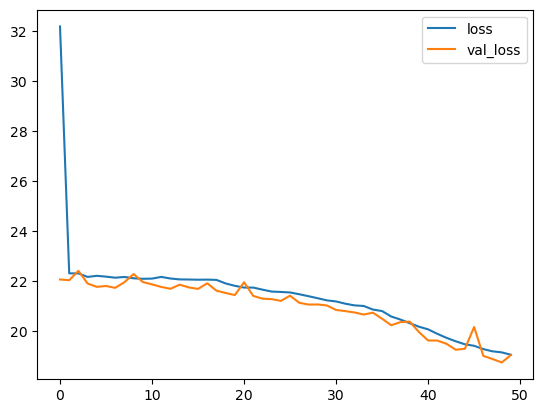

In [16]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()


X-axis represents the number of epochs (training iterations) the model has been trained on. Each epoch involves going through the entire training dataset once.

Y-axis represents the loss value. Lower loss indicates better model performance on the training data (for the training loss) and validation data (for the validation loss).

Both training and validation loss seem to be decreasing. This suggests that the model is learning from the training data and generalizing well to unseen data in the validation set.

The rate of decrease appears to be slowing down. This could indicate that the model is approaching its optimal performance.

It would be helpful to see the plot for a larger number of epochs to see if the validation loss continues to decrease or starts to increase. If it increases, it might be a sign of overfitting and techniques like early stopping or regularization could be used to address it.

#  Model Evaluation

We have predicted using the trained neural network on the testing data.
The variable predictions contains the predicted total run scores for the test set based on the model’s learned patterns.

In [17]:
# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)


690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


19.540864149066294

# Let’s create an Interactive Widget

We have created an interactive widget using ipywidgets to predict the score based on user input for venue, batting team, bowling team, striker, and bowler.
We have created dropdown widgets to select values for venue, batting team, bowling team, striker, and bowler.
Then, we have added a “Predicted Score” button widget. Whenever, the button will be clicked, the predict_score function will be called and then perform the following steps:
Decodes the user-selected values to their original categorical values.
Encodes and scales these values to match the format used in model training.
Uses the trained model to make a prediction based on the user’s input.
Displays the predicted score.

In [18]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(), description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(), description='Select Batting Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output() # Clear the previous output


# Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])


        input = np.array([decoded_venue, decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])

        print(predicted_score)


The widget-based interface allows you to interactively predict the score for specific match scenarios. Now, we have set up the button to trigger the predict_score function when clicked and display the widgets for venue, batting team , bowling team, striker and bowler.

In [19]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)


Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Batting Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()

We have predicted the score of the match between CSK and King XI Punjab in Punjab Cricket Stadium. The predicted score of the match is 183.

By harnessing the power of ML and DL, we have successfully predicted the cricket scores based on historical data. The model’s ability to predict cricket scores can be a valuable asset for IPL enthusiasts, teams, and analysts. It can provide insights into the dynamics of a match and help anticipate how different factors impact the final score.